In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("2019nCoV_national.csv")
Y = df['Infection']
Date = df['Date'] + '/'+'23:59'
Day = pd.Series(np.arange(43,43+Y.shape[0]),name = 't')
R = pd.concat([Date,Y,Day],axis = 1)
R

,Date,Infection,t
0,2020.01.20/23:59,291,43
1,2020.01.21/23:59,440,44
2,2020.01.22/23:59,571,45
3,2020.01.23/23:59,830,46
4,2020.01.24/23:59,1287,47
5,2020.01.25/23:59,1975,48
6,2020.01.26/23:59,2744,49
7,2020.01.27/23:59,4515,50
8,2020.01.28/23:59,5974,51
9,2020.01.29/23:59,7711,52


In [57]:
p = 0.695
T_1 = 8.4
T_2 = 10.0
lambd=np.log(R['Infection']) / R['t']
lambd

0     0.131938
1     0.138336
2     0.141053
3     0.146118
4     0.152342
5     0.158090
6     0.161575
7     0.168303
8     0.170494
9     0.172123
10    0.173190
11    0.173613
12    0.174065
13    0.174160
14    0.174125
15    0.174124
16    0.173570
dtype: float64

In [58]:
R1 = 1+lambd*T_1 + p*(1-p)*pow((lambd*T_1),2)
R1.name='R0(T_g = 8.4)'
R1

0     2.368641
1     2.448249
2     2.482429
3     2.546729
4     2.626794
5     2.701768
6     2.747703
7     2.837417
8     2.866916
9     2.888955
10    2.903423
11    2.909171
12    2.915326
13    2.916613
14    2.916144
15    2.916130
16    2.908583
Name: R0(T_g = 8.4), dtype: float64

In [59]:
R2 = 1+lambd*T_2 + p*(1-p)*pow((lambd*T_2),2)
R2.name='R0(T_g = 10.0)'
R2

0     2.688374
1     2.789010
2     2.832276
3     2.913756
4     3.015372
5     3.110679
6     3.169141
7     3.283472
8     3.321106
9     3.349236
10    3.367710
11    3.375051
12    3.382911
13    3.384555
14    3.383956
15    3.383939
16    3.374299
Name: R0(T_g = 10.0), dtype: float64

In [61]:
Rn = pd.concat([R,R1,R2],axis = 1)
Rn

,Date,Infection,t,R0(T_g = 8.4),R0(T_g = 10.0)
0,2020.01.20/23:59,291,43,2.368641,2.688374
1,2020.01.21/23:59,440,44,2.448249,2.789010
2,2020.01.22/23:59,571,45,2.482429,2.832276
3,2020.01.23/23:59,830,46,2.546729,2.913756
4,2020.01.24/23:59,1287,47,2.626794,3.015372
5,2020.01.25/23:59,1975,48,2.701768,3.110679
6,2020.01.26/23:59,2744,49,2.747703,3.169141
7,2020.01.27/23:59,4515,50,2.837417,3.283472
8,2020.01.28/23:59,5974,51,2.866916,3.321106
9,2020.01.29/23:59,7711,52,2.888955,3.349236


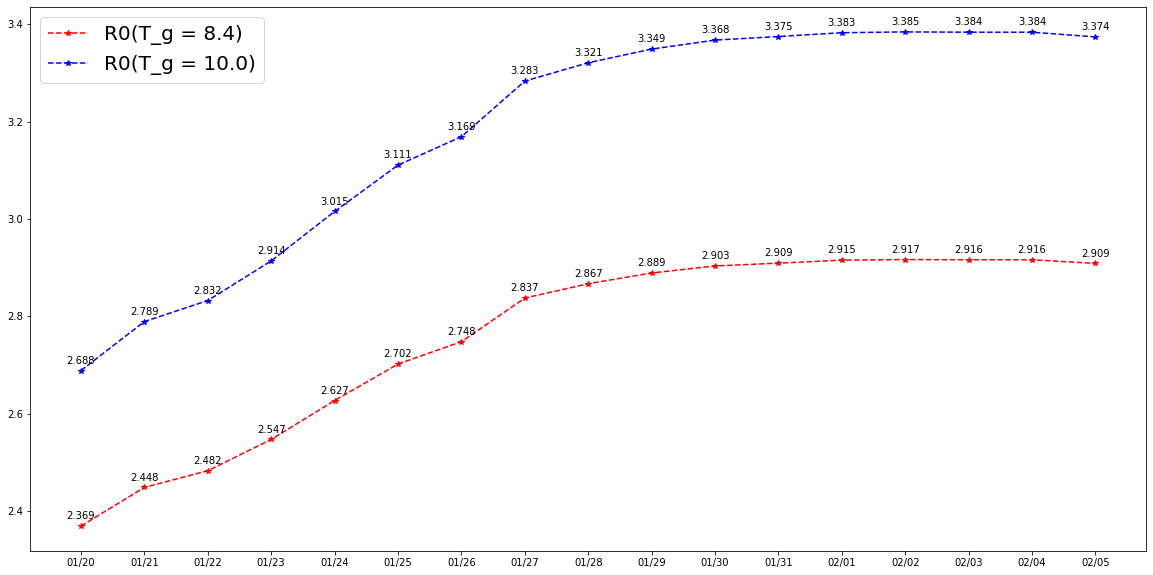

In [97]:
x = df['Date'].str.split('.',expand = True)
x = x[1]+'/'+x[2]
fig = plt.figure(figsize =(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(x,R1,'r*--',label = R1.name)
for a,b in zip(x,R1):
    ax.text(a, b+0.01, '%.3f' % b, ha='center', va= 'bottom',fontsize=10)
ax.plot(x,R2,'b*--',label = R2.name)
for a,b in zip(x,R2):
    ax.text(a,b+0.01,"%.3f"%b,ha = 'center',va ='bottom',fontsize = 10)
ax.legend(loc = "upper left",fontsize = 20)
plt.savefig('2019nCoV_R0.jpg')